In [1]:
# Pycache are evil, don't produce them
from enum import unique
from logging import raiseExceptions
import sys
sys.dont_write_bytecode = True

import pandas as pd

import seaborn as sns
# set desired graph size
sns.set(rc={'figure.figsize':(15,10)})
# set background color
sns.set(rc={"axes.facecolor":"white", "figure.facecolor":"white"})

import argparse

#from inspect_stock import check_query
sys.path.append('Features')
from inspect_stock import check_query

#------------------------------

def terminal_call_stock_ROI():
    """
    Description:
        This functions trigger the terminal input interface for feature stock_ROI

    Input Signature:
        1. Nothing. The sole purpose of this function is to facilitate the use within the terminal.
        2. Within the terminal, however, the user needs to manually input:
            - ticker symbol
            - investment year
            - investment month
            - buying price
            - divestment year
            - divestment month
            - selling price

    Output Signature:
        1. Call upon the main_stock_ROI method and return whatever the said method returns
    """

    # using argparse to get terminal input
    parser = argparse.ArgumentParser(description = "Demonstrating Argparse Library")

    # each line add AN argument to our terminal inout
    parser.add_argument("ticker", type = str, help = "ticker symbol of the stock of interest")
    parser.add_argument("date_invest_year", type = int, help = "the year that you hypothetically bought the stock")
    parser.add_argument("date_invest_month", type = int, help = "the month that you hypothetically bought the stock")
    parser.add_argument("buying_price", type = str, help = "the price that you hypothetically bought the stock at\
        , choose between 'Open', 'Close', 'High', and 'Close'")
    parser.add_argument("date_divest_year", type = int, help = "the year that you hypothetically sold the stock")
    parser.add_argument("date_divest_month", type = int, help = "the month that you hypothetically sold the stock")
    parser.add_argument("selling_price", type = str, help = "the price that you hypothetically bought the stock at\
        , choose between 'Open', 'Close', 'High', and 'Close'")

    # parse all arguments
    args = parser.parse_args()

    # storing the entered arguments internally within our code for ease of access
    ticker = args.ticker
    date_invest = [args.date_invest_year, args.date_invest_month]
    date_divest = [args.date_divest_year, args.date_divest_month]
    buying_price = args.buying_price
    selling_price = args.selling_price

    return main_stock_ROI(ticker, date_invest, date_divest, buying_price, selling_price)

#------------------------------

def main_stock_ROI(ticker, date_invest, date_divest, buying_price, selling_price, data_file = "./Data/Polished/randomized_day_market.csv"):
    """
    Description
        1. This is the main() function of this feature stock_ROI
        2. It will check the validity of the input by calling input_is_valid()
        3. Then it will calculate and return the ROI of the stock by calling the backbone_stock_ROI method

    Input Signature:
        1. ticker symbol (string)
        2. date_invest (two-element list in the format [year, month])
        3. date_divest (two-element list in the format [year, month])
        4. buying price (a string, choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close')
        5. selling price (a string, choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close')
        6. data_file: the path to our .csv file
    """

    # read in the data
    nasdaq_df = pd.read_csv(data_file)
    
   # check if the input is valid
    validity = all_input_is_valid_stock_ROI(nasdaq_df, ticker, date_invest, date_divest, buying_price, selling_price)

    if validity == True:

        # find the ROI of the stock if all inputs are appropriate
        ROI = backbone_stock_ROI(nasdaq_df, ticker, date_invest, date_divest, buying_price, selling_price)

        return ROI

    else:
        return(validity) # return the error message

#------------------------------

def all_input_is_valid_stock_ROI(dataframe, ticker, date_invest, date_divest, buying_price, selling_price):
    """
    Description:
        1. This function check if all inputed values are appropriate

    Input:
        1. the Pandas dataframe object that is read from our .csv file
        2. the ticker symbol
        3. the date of investment (two-element list in the format [year, month])
        4. the date of divestment (two-element list in the format [year, month])
        5. the buying price of the stock (a string, choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close')
        6. the selling price of the stock (a string, choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close')

    Output:
        1. A boolean representing whether the parameters specified are appropriate
    """

    # check ticker
    if not in_dateframe(ticker, "Ticker Symbol", dataframe):
        return "INPUT ERROR: Invalid ticker symbol. Please choose one that exists within our data instead."

    # check invest date
    if not in_dateframe(date_invest[0], "Year", dataframe):
        return "INPUT ERROR: Invalid year for investment date."
    else: # check month if year is valid
        if not in_dateframe(date_invest[1], "Month", dataframe.loc[dataframe["Year"] == date_invest[0]]):
            return "INPUT ERROR: Invalid investment date. The given month is not in our data."
    
    # check divest date
    if not in_dateframe(date_divest[0], "Year", dataframe):
        return "INPUT ERROR: Invalid year for divestment date."
    else: # check month if year is valid
        if not in_dateframe(date_divest[1], "Month", dataframe.loc[dataframe["Year"] == date_divest[0]]):
            return "INPUT ERROR: Invalid divestment date. The given month is not in our data."

    # check the queries in question
    if not check_query(buying_price):
        return "INPUT ERROR: Invalid buying price. Choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close' only."
    if not check_query(selling_price):
        return "INPUT ERROR: Invalid selling price. Choose between 'Open', 'Close', 'High', 'Close', and 'Adjusted Close' only."

    # if no error is encountered, return True
    return True

#------------------------------

def in_dateframe(value, column, dataframe):
    """
    Description:
        Check if a value is within a column of a dataframe
    
    Input:
        1. the value we want to check
        2. the column that we want to check within
    
    Output:
        1. A boolean representing whether or not the specified datapoint is found within the specified column
    """

    if value in dataframe[column].values:
        return True

    else:
        return False

#------------------------------

def backbone_stock_ROI(dateframe, ticker, date_invest, date_divest, buying_price, selling_price):
    """
    Description
        This function automatically calculate the ROI of a stock given the investment and divestment time.

    Input Signature:
        1. ticker symbol (string)
        2. date of investment (list); [year of investment, month of investment]
        3. date of divestment (list); [year of divestment, month of divestment]
        4. buying price (string, "Open", "Close", "Adjusted Close", "Low", "High"); default = "Open"
        5. selling price (string, "Open", "Close", "Adjusted Close", "Low", "High"); default = "Close"

    Output Signature:
        1. The calculated return on investment in percentage (float data format), for the specified stock.
    """

    # finding the invested amount
    investmet = float(dateframe.loc[(dateframe["Ticker Symbol"] == ticker) &\
        (dateframe["Year"] == date_invest[0]) &\
        (dateframe["Month"] == date_invest[1])]\
        [buying_price])

    # finding the divested amount
    divestment = float(dateframe.loc[(dateframe["Ticker Symbol"] == ticker) &\
        (dateframe["Year"] == date_divest[0]) &\
        (dateframe["Month"] == date_divest[1])]\
        [selling_price])

    # calculating ROI
    stock_ROI = percentage_difference(initial=investmet, final=divestment)
    
    return stock_ROI

#------------------------------

def percentage_difference(initial, final):
    """
    Description:
        This function finds the percentage difference between 2 numbers.

    Input:
        1. Two numbers (kinda obvious)

    Output:
        2. Calculated difference of the two numbers in percentage
    """

    difference = (final - initial) / initial

    # return the percentage value
    return (difference * 100)

#------------------------------

def stock_years(ticker, dataframe):
    """
    DESCRIPTION:
        Find all available years of a stock

    INPUT SIGNATURE:
        1. ticker (string): the ticker of the stock in question
        2. dataframe (Pandas): a pandas dataframe that is passed into this method

    OUTPUT SIGNATURE:
        1. unique_years (list): an ascending list of all the years available
    """

    # filter out only the relevant ticker
    lone_ticker_df = dataframe[dataframe["Ticker Symbol"] == ticker]

    unique_years = list(lone_ticker_df["Year"].unique())
    unique_years.sort()

    return unique_years

#------------------------------

def extreme_month_of_year(ticker, year, method, dataframe):
    """
    DESCRIPTION:
        Given a ticker and a year, find the earliest/latest month of available statistic of that ticker in that year
    
    INPUT SIGNATURE:
        1. ticker (string): the ticker in question
        2. year (int): the year in question
        3. dataframe (Pandas): the dataframe loaded from our dataset

    OUTPUT SIGNATURE:
        1. month (int): the earliest/latest month available of that year
    """

    # filter out only the relevant ticker
    lone_ticker_df = dataframe[dataframe["Ticker Symbol"] == ticker]

    # filter out only the desired year
    lone_year_df = lone_ticker_df.loc[lone_ticker_df["Year"] == year]

    # get a list of the months
    months = list(lone_year_df["Month"].unique())

    if method == "earliest":
        # find the smallest month
        earliest_month = min(months)
        return earliest_month

    elif method == "latest":
        # find the largest month
        latest_month = max(months)
        return latest_month

    else:
        return "Invalid Method argument for extreme_month_of_year() function. Only accept 'earliest' or 'latest'."

#------------------------------

def all_ROIs_one_ticker(ticker, dataframe):
    """
    DESCRIPTION:
        Calculate all ROIs of a stock over the years
    
    INPUT SIGNATURE:
        1. ticker (string): the ticker of the stock of interest
        2. dataframe (Pandas): Pandas dataframe of our dataset

    OUTPUT SIGNATURE:
        1. yearly_ROI_df (Pandas): Pandas dataframe with 2 columns
            - Year
            - ROI (of that year)
        2. unique_years (list): list of unique years of said ticker
        3. ROIs (list): list of corresponding ROIs for each year of said ticker
    """

    # find all the years available in the dataset of our stock
    unique_years = stock_years(ticker, dataframe)

    # empty list to store yearly ROIs
    ROIs = []

    # find the first year, which is also the year of investment
    first_year = unique_years[0]

    # find the earliest time one can invest in the first year
    first_month = extreme_month_of_year(ticker, first_year, method = "earliest", dataframe = dataframe)

    # calculate ROI for each year (compared to the first year)
    for year in unique_years:

        # divestment month at the end of the year
        last_month = extreme_month_of_year(ticker, year, method = "latest", dataframe = dataframe)

        ROI = backbone_stock_ROI(dateframe = dataframe,\
            ticker = ticker,\
            date_invest = [first_year, first_month],\
            date_divest = [year, last_month],\
            buying_price = "Low",\
            selling_price = "High")

        # ROI = backbone_stock_ROI(dataframe, ticker,\
            # [first_year, first_month], [year, last_month],\
            # "Low", "High")

        ROIs.append(ROI)

    # merge data into a nice dataframe
    data = {'Year':unique_years, 'ROI':ROIs}
    yearly_ROI_df = pd.DataFrame(data)

    return yearly_ROI_df, unique_years, ROIs

#------------------------------

def graph_ROIs_over_time_one_stock(ticker, dataframe):
    """
    DESCRIPTION:
        Use seaborn to generate a graph of ROI and save it within the Flask folder

    INPUT SIGNATURE:
        1. ticker (string): the ticker of the stock in question
        2. dataframe (Pandas): the dataframe containing said ticker

    OUTPUT SIGNATURE:
        1. graph: saved within ../Flask/static/photos/graphs
    """

    # get unique years and ROIs for each year
    yearly_ROI_df, unique_year, ROIs = all_ROIs_one_ticker(ticker, dataframe)

    # generate appropriate palette
    colors = [] # empty list to store all colors
    for ROI in ROIs:

        if ROI == max(ROIs):
            colors.append("#58a7a0")
        
        elif ROI == min(ROIs):
            colors.append("#A7585F")

        else:
            colors.append("#CEBACB")

    # generate the graph
    graph_yearly_ROI = sns.barplot(x = "Year",\
        y = "ROI",\
        data = yearly_ROI_df,\
        palette = colors) # palette = ["#bacebd" if x != max(ROIs) else "#a7585f" for x in dataframe["Ticker Symbol"]]

    # set title to graph
    graph_yearly_ROI.set_title("Yearly Return on Investment (%) for " + ticker)

    # add label to each bar
    for p in graph_yearly_ROI.patches:
        graph_yearly_ROI.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords = 'offset points')

    # generate graph's name and path
    name = "yearly_ROIs_" + ticker + ".png"
    location = "../Flask/static/photos/graphs/"
    final_path = location + name

    # export graph as png
    graph_yearly_ROI.get_figure().savefig(final_path)

    # return the name for accessibility from other functions
    return (final_path)


In [2]:
stocks_df = pd.read_csv("../Data/Polished/randomized_day_market.csv")
stocks_df[stocks_df["Ticker Symbol"] == "TSLA"]
stocks_df

print(stocks_df)

              Date  Day  Month  Year        Low       Open     Volume  \
0       2012-01-31   31      1  2012   8.100000   8.460000  8566500.0   
1       2012-02-22   22      2  2012   7.690000   7.900000  5383700.0   
2       2012-12-03   12      3  2012   6.870000   7.000000  5282400.0   
3       2012-04-16   16      4  2012   7.850000   7.860000  7014600.0   
4       2012-05-30   30      5  2012  12.460000  12.600000  8895400.0   
...            ...  ...    ...   ...        ...        ...        ...   
189723  2021-12-31   31     12  2021  47.580002  48.150002   232200.0   
189724  2022-03-01    3      1  2022  47.820000  48.189999   289300.0   
189725  2022-03-02    3      2  2022  43.090000  43.860001   198400.0   
189726  2022-04-03    4      3  2022  43.430000  45.810001   464800.0   
189727  2022-04-04    4      4  2022  38.049999  38.410000    85255.0   

             High      Close Ticker Symbol  
0        8.500000   8.440000           AAL  
1        8.080000   7.700000     

'../Flask/static/photos/graphs/yearly_ROIs_IBM.png'

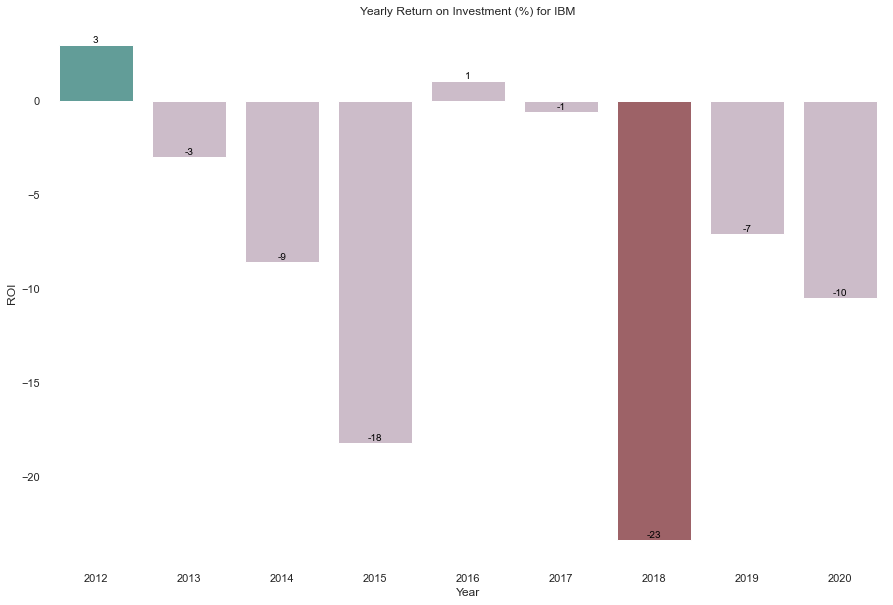

In [3]:
graph_ROIs_over_time_one_stock("IBM", stocks_df)

In [4]:
float(stocks_df.loc[(stocks_df["Ticker Symbol"] == "AAPL") &\
    (stocks_df["Year"] == 2012) &\
    (stocks_df["Month"] == 12)]\
    ["Low"])

18.023571014404297